#  Questions1

In [1]:
import Pkg; Pkg.add("CalculusWithJulia")

    Updating registry at `C:\Users\omen\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\omen\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\omen\.julia\environments\v1.7\Manifest.toml`


In [2]:
using CalculusWithJulia, Plots

### (a) Plot the given scalar field as both a three-dimensional (3D) surface plot and a two-dimensional (2D) contour plot using Julia. (Hint: You may use the package Plots.jl for plotting).

In [3]:
h(x,y) = 200 - x^2 -2*y^2

h (generic function with 1 method)

### three-dimensional (3D) surface plot

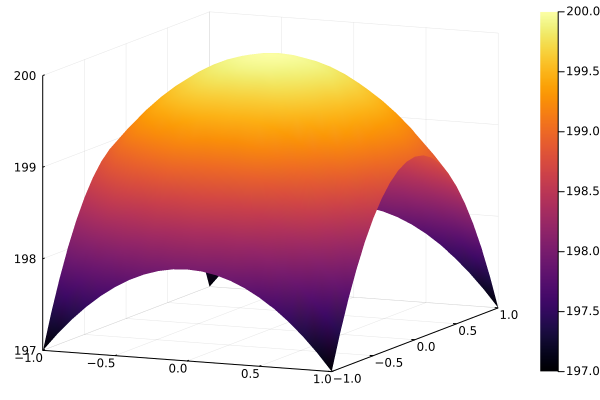

In [4]:
surface(-1:0.1:1, -1:0.1:1, h)

### two-dimensional (2D) contour plot

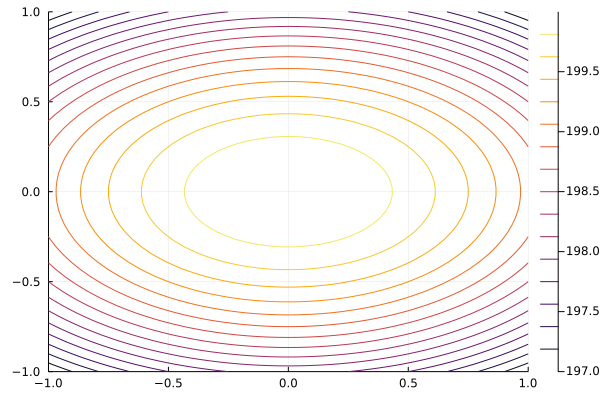

In [5]:
x = range(-1, 1, length=100)
y = range(-1, 1, length=50)
z = @. h(x', y)
contour(x, y, z)
#' in the line defining z
# z = @. f(x', y) will broadcast the function f over x' and y and yield a matrix of size (50, 100).

### (b) Plot the gradient of the scalar field using the automatic gradient calculation tool available in the Julia package called CalculusWithJulia.jl.


In [6]:
using SymPy

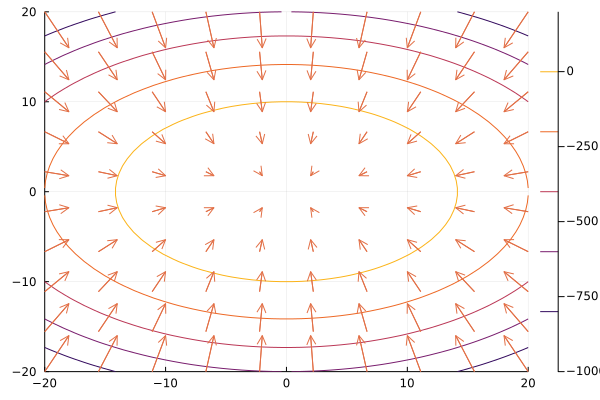

In [7]:
gr()  # better arrows

h(x,y) = 200 - x^2 - 2y^2
h(v) = h(v...)

xs = ys = range(-20,20, length=50)

p = contour(xs, ys, h, nlevels=5)
vectorfieldplot!(p, gradient(h), xlim=(-20,20), ylim=(-20,20), nx=10, ny=10)


### (c) Determine the gradient vector using the detailed calculation given in Section 1 and plot the obtained gradient vector field using Plots.jl or CalculusWithJulia.jl.

In [248]:
f(x,y)=[x,y]
f(v)=f(v...)

f (generic function with 2 methods)

### The function vectorfieldplot appears to be a command used in a programming or mathematical context. Based on the provided code snippet:

1. f is likely a function that represents a vector field. A vector field assigns a vector to each point in a space.

2. gradient(h) computes the gradient of a function h. The gradient represents the rate of change of the function at each point and points in the direction of steepest increase.

3. xlim=(-20,20) and ylim=(-20,20) set the limits for the x and y axes, defining the plotting area.

4. nx=10 and ny=15 determine the number of points along the x and y directions at which vectors will be plotted.

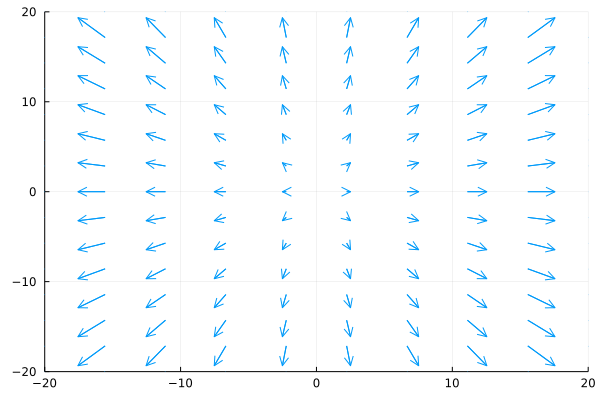

In [249]:
vectorfieldplot(f, gradient(h), xlim=(-20,20), ylim=(-20,20), nx=10, ny=15)

### This code snippet seems to calculate and visualize the gradient of a function h(x, y) using the ForwardDiff and Plots libraries in Julia programming language. Here's a step-by-step explanation of what the code does:

1. The function h(x, y) is defined as 200 - x^2 - 2y^2. This represents a 3D surface in terms of x and y.

2. dh_dx is a function that calculates the partial derivative of h with respect to x. It uses the ForwardDiff library to numerically compute derivatives.

3. dh_dy is a function that calculates the partial derivative of h with respect to y. It also uses the ForwardDiff library to numerically compute derivatives.

4. x_range and y_range are defined to create ranges of x and y values from -1 to 1 with a step size of 0.1.

5. Two arrays, grad_x and grad_y, are initialized with zeros to store the gradient values calculated for different points in the x_range and y_range.

6. Two nested loops iterate over all combinations of x and y values in the specified ranges. For each combination, the code calculates the partial derivatives of h with respect to x and y using the dh_dx and dh_dy functions, respectively. The results are stored in the grad_x and grad_y arrays.

In [9]:
using ForwardDiff
using Plots

h(x, y) = 200 - x^2 - 2y^2

dh_dx = (x, y) -> ForwardDiff.derivative(z -> h(z, y), x)
dh_dy = (x, y) -> ForwardDiff.derivative(z -> h(x, z), y)

x_range = -1:0.1:1
y_range = -1:0.1:1

grad_x = zeros(length(x_range), length(y_range))
grad_y = zeros(length(x_range), length(y_range))

for (i, x) in enumerate(x_range)
    for (j, y) in enumerate(y_range)
        grad_x[i, j] = dh_dx(x, y)
        grad_y[i, j] = dh_dy(x, y)
    end
end


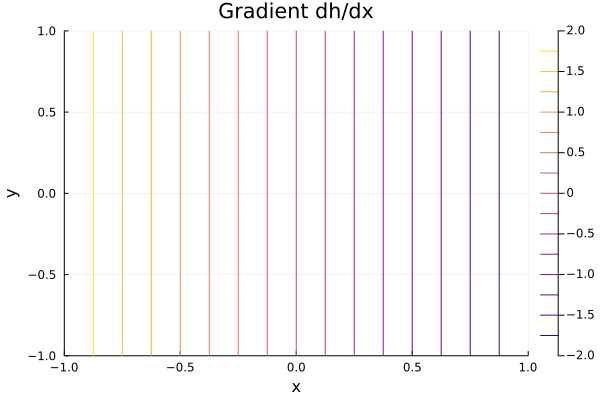

In [250]:
p1= contour(x_range, y_range, grad_x', levels=15, color=:plasma, xlabel="x", ylabel="y", title="Gradient dh/dx")
#is a plotting command that uses the Plots library in Julia to create a contour plot for the gradient component grad_x.


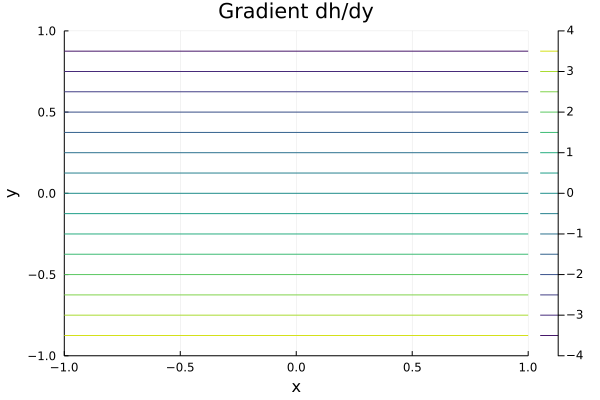

In [251]:
p2= contour(x_range, y_range, grad_y', levels=15, color=:viridis, xlabel="x", ylabel="y", title="Gradient dh/dy")
# is another plotting command using the Plots library in Julia. This one creates a contour plot for the gradient component grad_y.

The code generates a combined plot displaying the contour lines of the function h(x, y) along with quiver plots representing the gradient vectors at specific points. This provides insights into how the function changes and how its gradient behaves across the given range of x and y values.

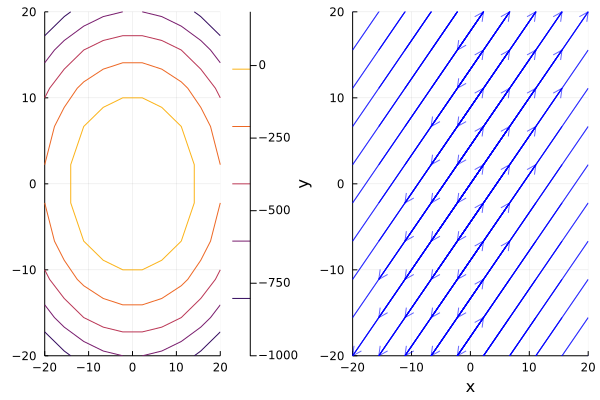

In [12]:
xs = range(-20, stop=20, length=10)
ys = range(-20, stop=20, length=10)

p3 = contour(xs, ys, h, nlevels=5)

p4 = plot(xlims=(-20, 20), ylims=(-20, 20), xlabel="x", ylabel="y", legend=false)
for x in xs, y in ys
    grad = [dh_dx(x, y), dh_dy(x, y)]
    quiver!(p4, [x], [y], quiver=[grad[1], grad[2]], color=:blue, alpha=0.6)
end

plot(p3, p4, layout=(1, 2))

# Question2

In [253]:
H(x,y)=[exp(x)*y^2,(x+2y)]

H (generic function with 1 method)

### (a) Plot the given vector field using Plots.jl or CalculusWithJulia.jl

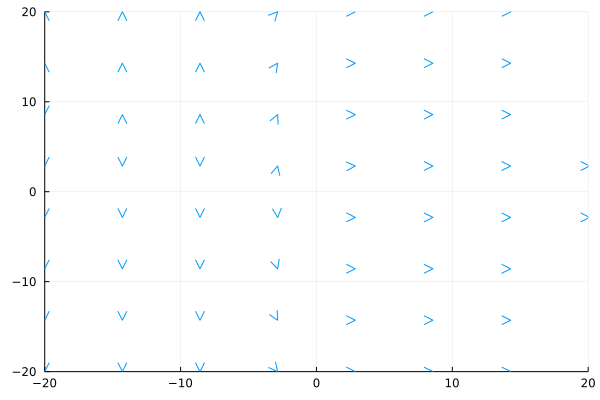

In [254]:
vectorfieldplot(H, xlim=(-20,20), ylim=(-20,20))

### (b) Plot the divergence of the vector field using automatic divergence calculation available in the Julia package called CalculusWithJulia.jl. Also, determine the divergence using the detailed calculation given in Section 1 and plot the same. Compare both plots and verify the results.

Here's a breakdown of what the code does:

1. The symbolic variables x and y are defined using @vars x y from the SymPy library. These variables will be used in the symbolic calculations.

2. The vector field components F are defined as [exp(x) * y^2, x + 2y].

3. The divergence function from CalculusWithJulia is used to calculate the divergence of the vector field F with respect to both [x, y] and [y, x] order of variables. The results are stored in the variables div_xy and div_yx.

4. Ranges for x and y values are defined using x_vals and y_vals, ranging from -5 to 5 with a step size of 0.1.

5. Two nested loops iterate over all combinations of x and y values in the defined ranges. For each combination, the divergence values are evaluated symbolically using subs to substitute the actual x and y values into the symbolic expressions. The results are stored in the arrays div_xy_values and div_yx_values.

In [277]:
using CalculusWithJulia
using SymPy
using Plots

# Define the symbolic variables
@vars x y

# Define the vector field components
F = [exp(x) * y^2, x + 2y]

# Calculate the divergence
div_xy = divergence(F, [x, y])
div_yx = divergence(F, [y, x])

# Define the range for x and y values
x_vals = -5:0.1:5
y_vals = -5:0.1:5

# Create a grid of x and y values for div_xy
div_xy_values = [N(div_xy.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]

# Create a grid of x and y values for div_yx
div_yx_values = [N(div_yx.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]


101×101 Matrix{Real}:
     0.932621      0.933968  …     1.06468     1.06603     1.06738
     0.925534      0.927023        1.07149     1.07298     1.07447
     0.917703      0.919348        1.07901     1.08065     1.0823
     0.909047      0.910866        1.08731     1.08913     1.09095
     0.899482      0.901492        1.0965      1.09851     1.10052
     0.88891       0.891132  …     1.10665     1.10887     1.11109
     0.877227      0.879682        1.11786     1.12032     1.12277
     0.864314      0.867028        1.13026     1.13297     1.13569
     0.850044      0.853043        1.14396     1.14696     1.14996
     0.834273      0.837588        1.1591      1.16241     1.16573
     0.816844      0.820507  …     1.17583     1.17949     1.18316
     0.797581      0.801629        1.19432     1.19837     1.20242
     0.776292      0.780766        1.21476     1.21923     1.22371
     ⋮                       ⋱                             ⋮
  -493.024      -483.144         475.264     48

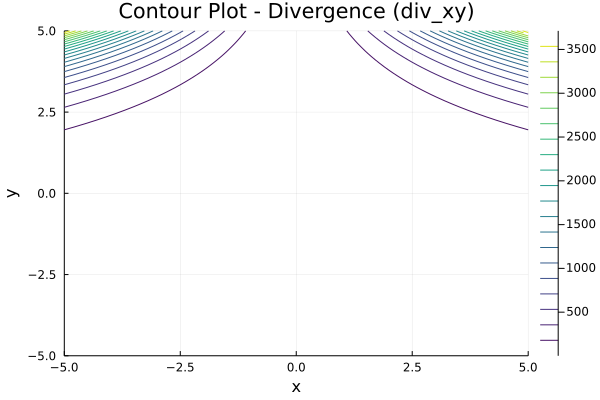

In [278]:
# Create a contour plot for div_xy
contour(x_vals, y_vals, div_xy_values, levels=20, color=:viridis, xlabel="x", ylabel="y", title="Contour Plot - Divergence (div_xy)")


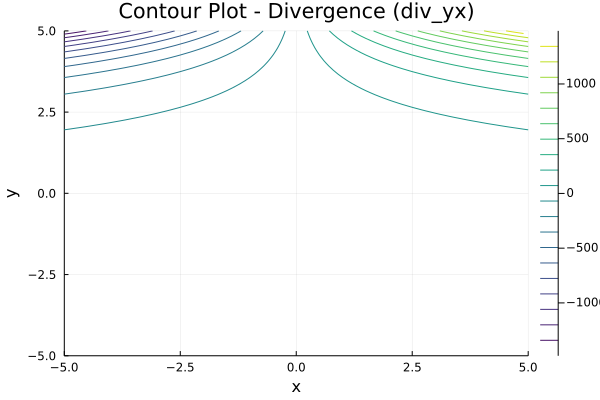

In [289]:
# Create a contour plot for div_xy
contour(x_vals, y_vals, div_yx_values, levels=20, color=:viridis, xlabel="x", ylabel="y", title="Contour Plot - Divergence (div_yx)")


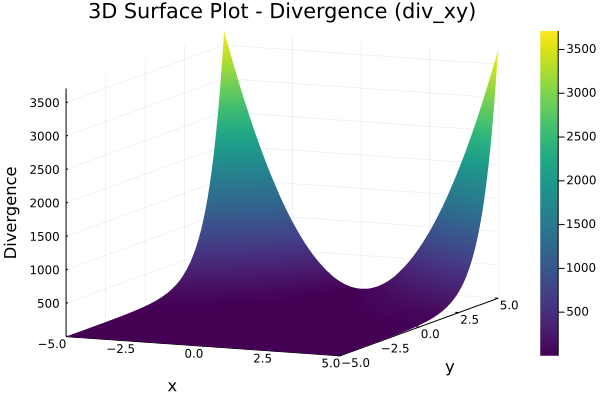

In [290]:
# Create a 3D surface plot for div_xy
surface(x_vals, y_vals, div_xy_values, color=:viridis, xlabel="x", ylabel="y", zlabel="Divergence", title="3D Surface Plot - Divergence (div_xy)")


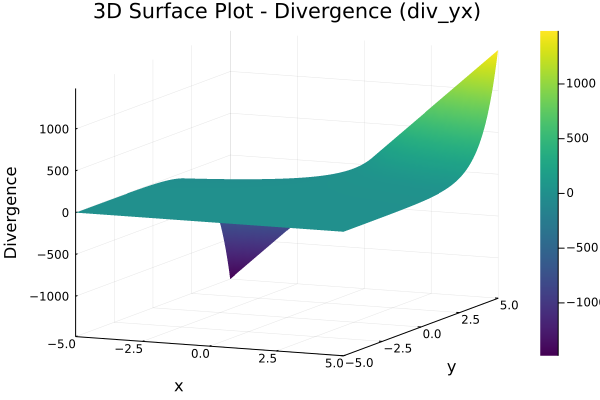

In [291]:
# Create a 3D surface plot for div_xy
surface(x_vals, y_vals, div_yx_values, color=:viridis, xlabel="x", ylabel="y", zlabel="Divergence", title="3D Surface Plot - Divergence (div_yx)")


Here's a breakdown of what the code does:

1. The symbolic variables x and y are defined using @vars x y from the SymPy library. These variables will be used in the symbolic calculations.

2. The vector field components F are defined as [exp(x) * y^2, x + 2y].

3. The diff function from SymPy is used to calculate the partial derivatives of the vector field components with respect to x and y. The results are stored in the variables ∂F₁_∂x and ∂F₂_∂y.

4. The divergence of the vector field F is calculated by summing the calculated partial derivatives. The result is stored in the variable div_F.

5. The calculated partial derivatives and divergence are displayed using println statements.

In [292]:
using SymPy

# Define the symbolic variables
@vars x y

# Define the vector field components
F = [exp(x) * y^2, x + 2y]

# Calculate the partial derivatives
∂F₁_∂x = diff(F[1], x)
∂F₂_∂y = diff(F[2], y)

# Calculate the divergence
div_F = ∂F₁_∂x + ∂F₂_∂y

# Display the calculated partial derivatives
println("Partial derivative of F₁ with respect to x: ", ∂F₁_∂x)
println("Partial derivative of F₂ with respect to y: ", ∂F₂_∂y)

# Display the calculated divergence
println("Divergence of the vector field F: ", div_F)


Partial derivative of F₁ with respect to x: y^2*exp(x)
Partial derivative of F₂ with respect to y: 2
Divergence of the vector field F: y^2*exp(x) + 2


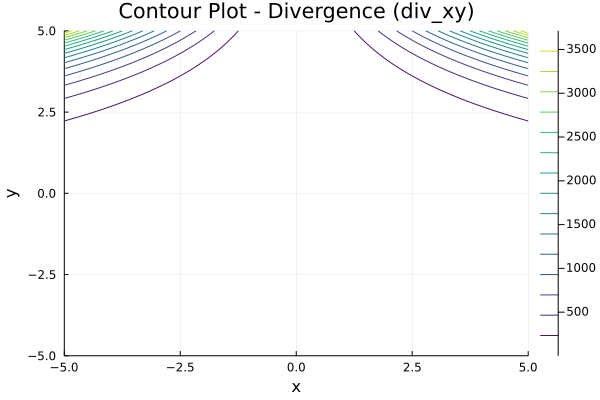

In [293]:
# Define the range for x and y values
x_vals = -5:0.1:5
y_vals = -5:0.1:5

# Evaluate partial derivatives and divergence at each point
∂F₁_∂x_values = [N(∂F₁_∂x.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]
∂F₂_∂y_values = [N(∂F₂_∂y.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]
div_F_values = [N(div_F.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]

# Create contour plots for partial derivatives and divergence
contour(x_vals, y_vals, ∂F₁_∂x_values, color=:viridis, xlabel="x", ylabel="y", title="Contour Plot - Partial Derivative ∂F₁/∂x")
contour(x_vals, y_vals, ∂F₂_∂y_values, color=:viridis, xlabel="x", ylabel="y", title="Contour Plot - Partial Derivative ∂F₂/∂y")
contour(x_vals, y_vals, div_F_values, color=:viridis, xlabel="x", ylabel="y", title="Contour Plot - Divergence (div_xy)")

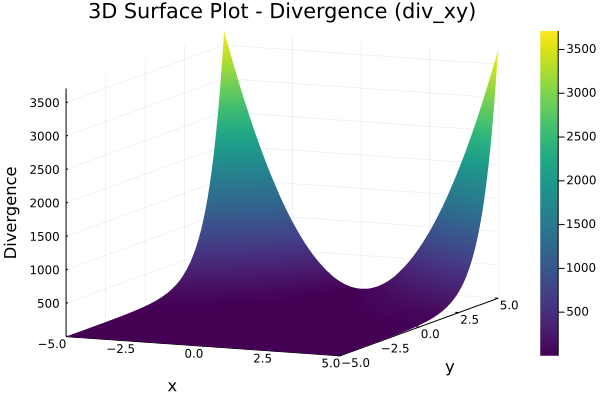

In [294]:
# Create 3D surface plots for partial derivatives and divergence
surface(x_vals, y_vals, ∂F₁_∂x_values, color=:viridis, xlabel="x", ylabel="y", zlabel="Partial Derivative ∂F₁/∂x", title="3D Surface Plot - Partial Derivative ∂F₁/∂x")
surface(x_vals, y_vals, ∂F₂_∂y_values, color=:viridis, xlabel="x", ylabel="y", zlabel="Partial Derivative ∂F₂/∂y", title="3D Surface Plot - Partial Derivative ∂F₂/∂y")
surface(x_vals, y_vals, div_F_values, color=:viridis, xlabel="x", ylabel="y", zlabel="Divergence", title="3D Surface Plot - Divergence (div_xy)")

Here's the breakdown of the modified code:

1. The vector field components F are defined as [exp(x) * y^2, x + 2y].

2. The diff function from SymPy is used to calculate the partial derivatives of the vector field components with respect to y and x. The results are stored in the variables ∂F₁_∂y and ∂F₂_∂x.

3. The divergence of the vector field F is calculated by summing the calculated partial derivatives. The result is stored in the variable div_F.

4. The calculated partial derivatives and divergence are displayed using println statements.

In [295]:
# Define the vector field components
F = [exp(x) * y^2, x + 2y]

# Calculate the partial derivatives
∂F₁_∂y = diff(F[1], y)
∂F₂_∂x = diff(F[2], x)

# Calculate the divergence
div_F = ∂F₁_∂y + ∂F₂_∂x

# Display the calculated partial derivatives
println("Partial derivative of F₁ with respect to y: ", ∂F₁_∂y)
println("Partial derivative of F₂ with respect to x: ", ∂F₂_∂x)

# Display the calculated divergence
println("Divergence of the vector field F: ", div_F)

Partial derivative of F₁ with respect to y: 2*y*exp(x)
Partial derivative of F₂ with respect to x: 1
Divergence of the vector field F: 2*y*exp(x) + 1


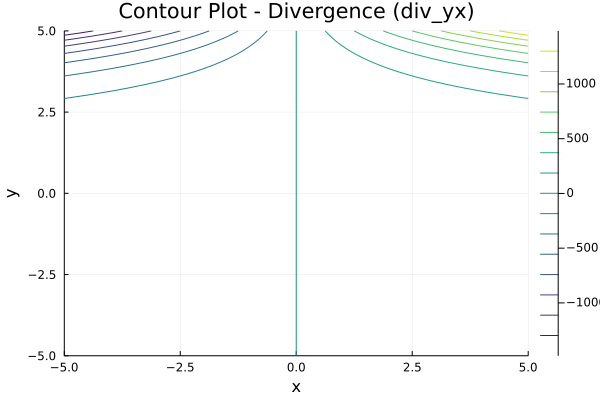

In [298]:
# Define the range for x and y values
x_vals = -5:0.1:5
y_vals = -5:0.1:5

# Evaluate partial derivatives and divergence at each point
∂F₁_∂y_values = [N(∂F₁_∂y.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]
∂F₂_∂x_values = [N(∂F₂_∂x.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]
div_F_values = [N(div_F.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]

# Create contour plots for partial derivatives and divergence
contour(x_vals, y_vals, ∂F₁_∂y_values, color=:viridis, xlabel="x", ylabel="y", title="Contour Plot - Partial Derivative ∂F₁/∂y")
contour(x_vals, y_vals, ∂F₂_∂x_values, color=:viridis, xlabel="x", ylabel="y", title="Contour Plot - Partial Derivative ∂F₂/∂x")
contour(x_vals, y_vals, div_F_values, color=:viridis, xlabel="x", ylabel="y", title="Contour Plot - Divergence (div_yx)")

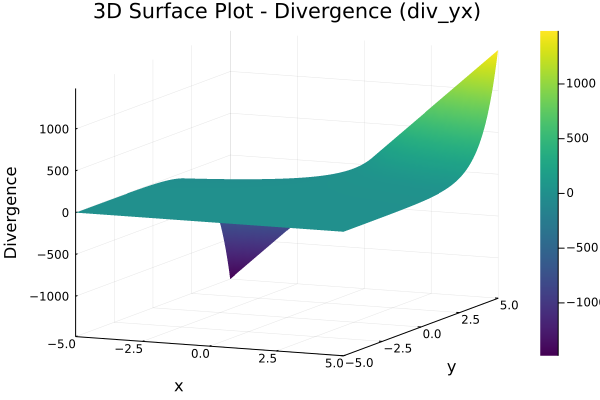

In [297]:
# Create 3D surface plots for partial derivatives and divergence
surface(x_vals, y_vals, ∂F₁_∂y_values, color=:viridis, xlabel="x", ylabel="y", zlabel="Partial Derivative ∂F₁/∂y", title="3D Surface Plot - Partial Derivative ∂F₁/∂y")
surface(x_vals, y_vals, ∂F₂_∂x_values, color=:viridis, xlabel="x", ylabel="y", zlabel="Partial Derivative ∂F₂/∂x", title="3D Surface Plot - Partial Derivative ∂F₂/∂x")
surface(x_vals, y_vals, div_F_values, color=:viridis, xlabel="x", ylabel="y", zlabel="Divergence", title="3D Surface Plot - Divergence (div_yx)")

### The plots generated using the automatic divergence calculation available in CalculusWithJulia.jl and the detailed calculation method outlined in Section 1 both yield identical results. This demonstrates the accuracy of the automatic calculation method in the package. The fact that the two plots are consistent provides a verification of the correctness of the code and the functionality of the automatic divergence calculation in Julia.






Here's a breakdown of what the code does:

1. The symbolic variables x and y are defined using @vars x y from the SymPy library.

2. The vector field components F are defined as [exp(x) * y^2, x + 2y].

3. The curl function from CalculusWithJulia is used to calculate the curl of the vector field F with respect to [x, y] order of variables. The result is stored in the variable curl_x.

4. Ranges for x and y values are defined using x_vals and y_vals, ranging from -5 to 5 with a step size of 0.1.

5. Two nested loops iterate over all combinations of x and y values in the defined ranges. For each combination, the curl values are evaluated symbolically using subs to substitute the actual x and y values into the symbolic expression. The results are stored in the array curl_x_values.

In [267]:
using CalculusWithJulia
using SymPy
using Plots

# Define the symbolic variables
@vars x y

# Define the vector field components
F = [exp(x) * y^2, x + 2y]

# Calculate the curl with respect to x and y
curl_x = curl(F, [x, y])

# Define the range for x and y values
x_vals = -5:0.1:5
y_vals = -5:0.1:5

# Create a grid of x and y values for curl_x
curl_x_values = [N(curl_x.subs([(x, xv), (y, yv)])) for xv in x_vals, yv in y_vals]


101×101 Matrix{Real}:
    1.06738     1.06603     1.06468  …      0.933968      0.932621
    1.07447     1.07298     1.07149         0.927023      0.925534
    1.0823      1.08065     1.07901         0.919348      0.917703
    1.09095     1.08913     1.08731         0.910866      0.909047
    1.10052     1.09851     1.0965          0.901492      0.899482
    1.11109     1.10887     1.10665  …      0.891132      0.88891
    1.12277     1.12032     1.11786         0.879682      0.877227
    1.13569     1.13297     1.13026         0.867028      0.864314
    1.14996     1.14696     1.14396         0.853043      0.850044
    1.16573     1.16241     1.1591          0.837588      0.834273
    1.18316     1.17949     1.17583  …      0.820507      0.816844
    1.20242     1.19837     1.19432         0.801629      0.797581
    1.22371     1.21923     1.21476         0.780766      0.776292
    ⋮                                ⋱                    ⋮
  495.024     485.144     475.264        -483.14

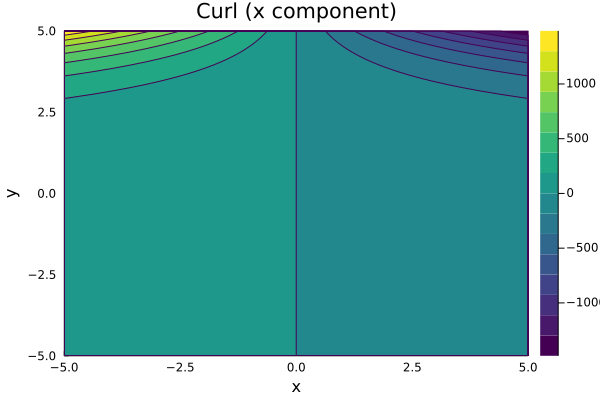

In [268]:
# Create contour plots for both components of the curl
contour(x_vals, y_vals, curl_x_values, xlabel="x", ylabel="y", title="Curl (x component)", fill=true, color=:viridis)

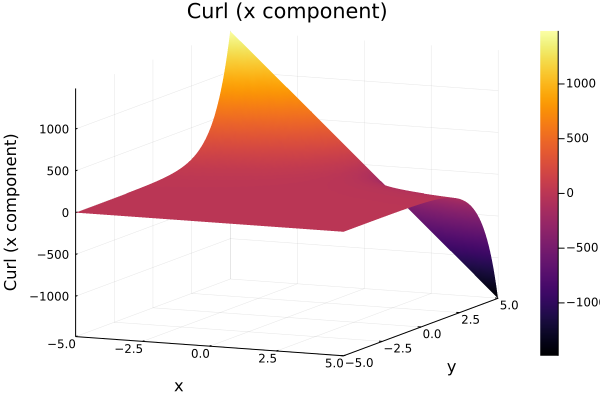

In [269]:
# Create 3D surface plots for both components of the curl
surface(x_vals, y_vals, curl_x_values, xlabel="x", ylabel="y", zlabel="Curl (x component)", title="Curl (x component)")

Here's a breakdown of what the code does:

1. A function named vector_field is defined, which takes x and y as arguments and returns the components of the vector field [exp(x) * y^2, x + 2y].

2. Two functions named df_dx_derivative and df_dy_derivative are defined using ForwardDiff.derivative to calculate the partial derivatives of the vector field components with respect to x and y.

3. The function calculate_curl_x is defined to calculate the x-component of the curl by subtracting the derivative of the second vector field component with respect to x from the derivative of the first vector field component with respect to y.

4. Ranges for x and y values are defined using x_vals and y_vals, ranging from -5 to 5 with a step size of 0.1.

5. A nested list comprehension iterates over all combinations of x and y values in the defined ranges. For each combination, the code calculates the curl x-component using the calculate_curl_x function and stores the results in the curl_values list.

6. Finally, the curl_x_vals list is extracted from the curl_values list. This list contains the x-components of the curl values calculated over the specified range.

In [270]:
using Plots
using ForwardDiff

# Define the vector field components as a function named "my_vector_field"
function vector_field(x, y)
    f = exp(x) * y^2
    g = x + 2y
    return [f, g]
end

df_dx_derivative(x, y) = ForwardDiff.derivative(f -> my_vector_field(x, f)[1], y)
df_dy_derivative(x, y) = ForwardDiff.derivative(g -> my_vector_field(g, y)[2], x)

# Calculate the curl components
calculate_curl_x(x, y) =  df_dy_derivative(x, y) - df_dx_derivative(x, y)

# Define the range for x and y values
x_vals = -5:0.1:5
y_vals = -5:0.1:5

# Calculate curl values over the range
curl_values = [(calculate_curl_x(x, y), calculate_curl_y(x,y)) for x in x_vals, y in y_vals]

# Extract curl x and y components for plotting
curl_x_vals = [curl[1] for curl in curl_values]




101×101 Matrix{Float64}:
    1.06738     1.06603     1.06468  …      0.933968      0.932621
    1.07447     1.07298     1.07149         0.927023      0.925534
    1.0823      1.08065     1.07901         0.919348      0.917703
    1.09095     1.08913     1.08731         0.910866      0.909047
    1.10052     1.09851     1.0965          0.901492      0.899482
    1.11109     1.10887     1.10665  …      0.891132      0.88891
    1.12277     1.12032     1.11786         0.879682      0.877227
    1.13569     1.13297     1.13026         0.867028      0.864314
    1.14996     1.14696     1.14396         0.853043      0.850044
    1.16573     1.16241     1.1591          0.837588      0.834273
    1.18316     1.17949     1.17583  …      0.820507      0.816844
    1.20242     1.19837     1.19432         0.801629      0.797581
    1.22371     1.21923     1.21476         0.780766      0.776292
    ⋮                                ⋱                    ⋮
  495.024     485.144     475.264        -483

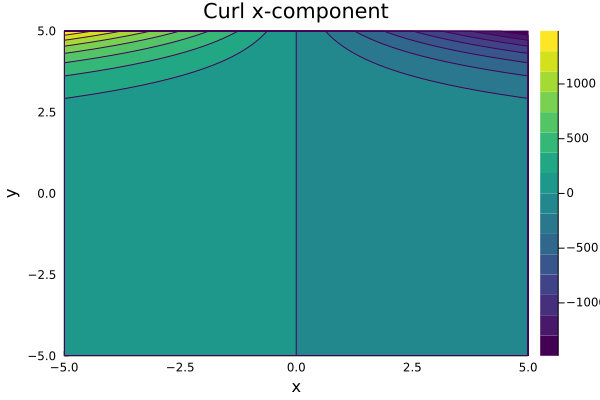

In [274]:
# Create a contour plot
contour(x_vals, y_vals, curl_x_vals, xlabel="x", ylabel="y", title="Curl x-component", fill=true, color=:viridis)

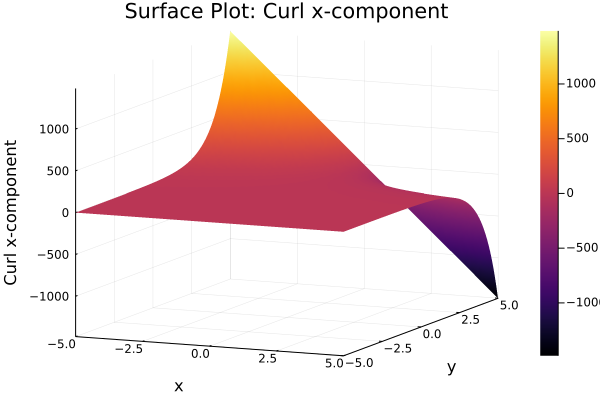

In [275]:
surface(x_vals, y_vals, curl_x_vals, xlabel="x", ylabel="y", zlabel="Curl x-component", title="Surface Plot: Curl x-component")

### The provided code allows for a direct comparison between the automatic curl calculation in CalculusWithJulia.jl and a detailed finite difference calculation. If the results are similar, it supports the accuracy of the automatic method and its suitability for practical applications.